In [47]:
Ejercicio 5. Utilizando seaborn crea un gráfico que muestre un punto para cada trayecto del día 25:
• El eje x será la hora de inicio del viaje (0-23).
• El eje y será la duración del trayecto.
• Para el estilo del marcador se usará el tipo de usuario.
• El tamaño del marcador se corresponderá con el rango de edad del usuario.

Nota: Como sólo hay 24 valores posibles para la hora, los puntos se acumularán en ellos. 
Se valorará encontrar una solución que mejore la visualización.
(Posibles funciones: catplot, stripplot, swarmplot)


SyntaxError: invalid syntax (662113228.py, line 1)

In [48]:
import json
import pandas as pd
import seaborn as sns

# Cargar los datos en un DataFrame
with open('C:/Users/Vespertino/Documents/iris/202106_movements_fixed.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [49]:
# Convert the unplug_hourTime column to a date-time format
#df['unplug_hourTime'] = pd.to_datetime(df['unplug_hourTime'])

# Filter the DataFrame to include only trips that occurred on the 25th day of the month
#df = df[df['unplug_hourTime'].dt.day == 25]
print('Número de columnas:', len(df))
df.info()

Número de columnas: 3960
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               3960 non-null   object
 1   user_day_code     3960 non-null   object
 2   idplug_base       3960 non-null   int64 
 3   user_type         3960 non-null   int64 
 4   idunplug_base     3960 non-null   int64 
 5   travel_time       3960 non-null   int64 
 6   idunplug_station  3960 non-null   int64 
 7   ageRange          3960 non-null   int64 
 8   idplug_station    3960 non-null   int64 
 9   unplug_hourTime   3960 non-null   object
 10  zip_code          3960 non-null   object
dtypes: int64(7), object(4)
memory usage: 340.4+ KB


<AxesSubplot:>

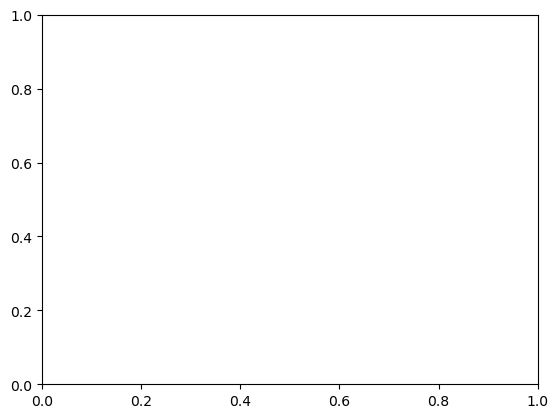

In [55]:
# Crear el gráfico utilizando Seaborn con datos existentes
df = df[df['unplug_hourTime'].str.contains('01')]

sns.scatterplot(x='unplug_hourTime', y='travel_time', hue='user_type', size='ageRange', data=df)

<AxesSubplot:>

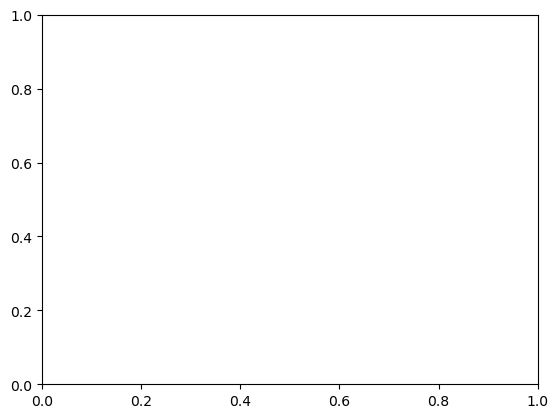

In [51]:
import pandas as pd
import seaborn as sns

# Carga los datos desde el archivo JSON
df = pd.read_json('C:/Users/Vespertino/Documents/iris/202106_movements_fixed.json')

# Extrae el día del mes de la columna 'unplug_hourTime'
df['day'] = pd.DatetimeIndex(df['unplug_hourTime']).day

# Selecciona los viajes del día 25
df = df[df['day'] == 25]

# Crea una nueva columna con la hora de inicio del viaje
df['start_hour'] = pd.DatetimeIndex(df['unplug_hourTime']).hour

# Agrupa los viajes por hora y calcula la duración promedio de los viajes
hourly_data = df.groupby('start_hour')['travel_time'].mean().reset_index()

# Agrega la información del tipo de usuario y rango de edad a los datos por hora
user_data = df[['start_hour', 'user_type', 'ageRange']].drop_duplicates()

hourly_data = pd.merge(hourly_data, user_data, on='start_hour')

# Crea el gráfico utilizando seaborn
sns.scatterplot(data=hourly_data, x='start_hour', y='travel_time', hue='user_type', size='ageRange')



In [52]:
Ejercicio 6. Utilizando seaborn, crea un gráfico para visualizar el número de usuarios de cada tipo 
según el día de la semana.
(Posibles funciones:catplot, bar_plot, count_plot)

SyntaxError: invalid syntax (3462018714.py, line 1)

In [ ]:
# Lib
import matplotlib.pyplot as plt

# Carga de datos en un DataFrame de Pandas
data = pd.read_json("C:/Users/Vespertino/Documents/iris/202106_movements_fixed.json")

# Agregar columna para el día de la semana
data["day_of_week"] = pd.to_datetime(data["unplug_hourTime"]).dt.day_name()

# Crear el gráfico utilizando Seaborn
sns.countplot(x="day_of_week", hue="user_type", data=data)

# Agregar título y etiquetas de los ejes
plt.title("Número de usuarios por tipo y día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de usuarios")